In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import math

In [5]:
with (open("higgs.pkl", "rb")) as openfile:
    higgs = pickle.load(openfile)
with (open("qcd.pkl", "rb")) as openfile:
    qcd = pickle.load(openfile)

# 1) Do all features provide discrimination power between signal and background?

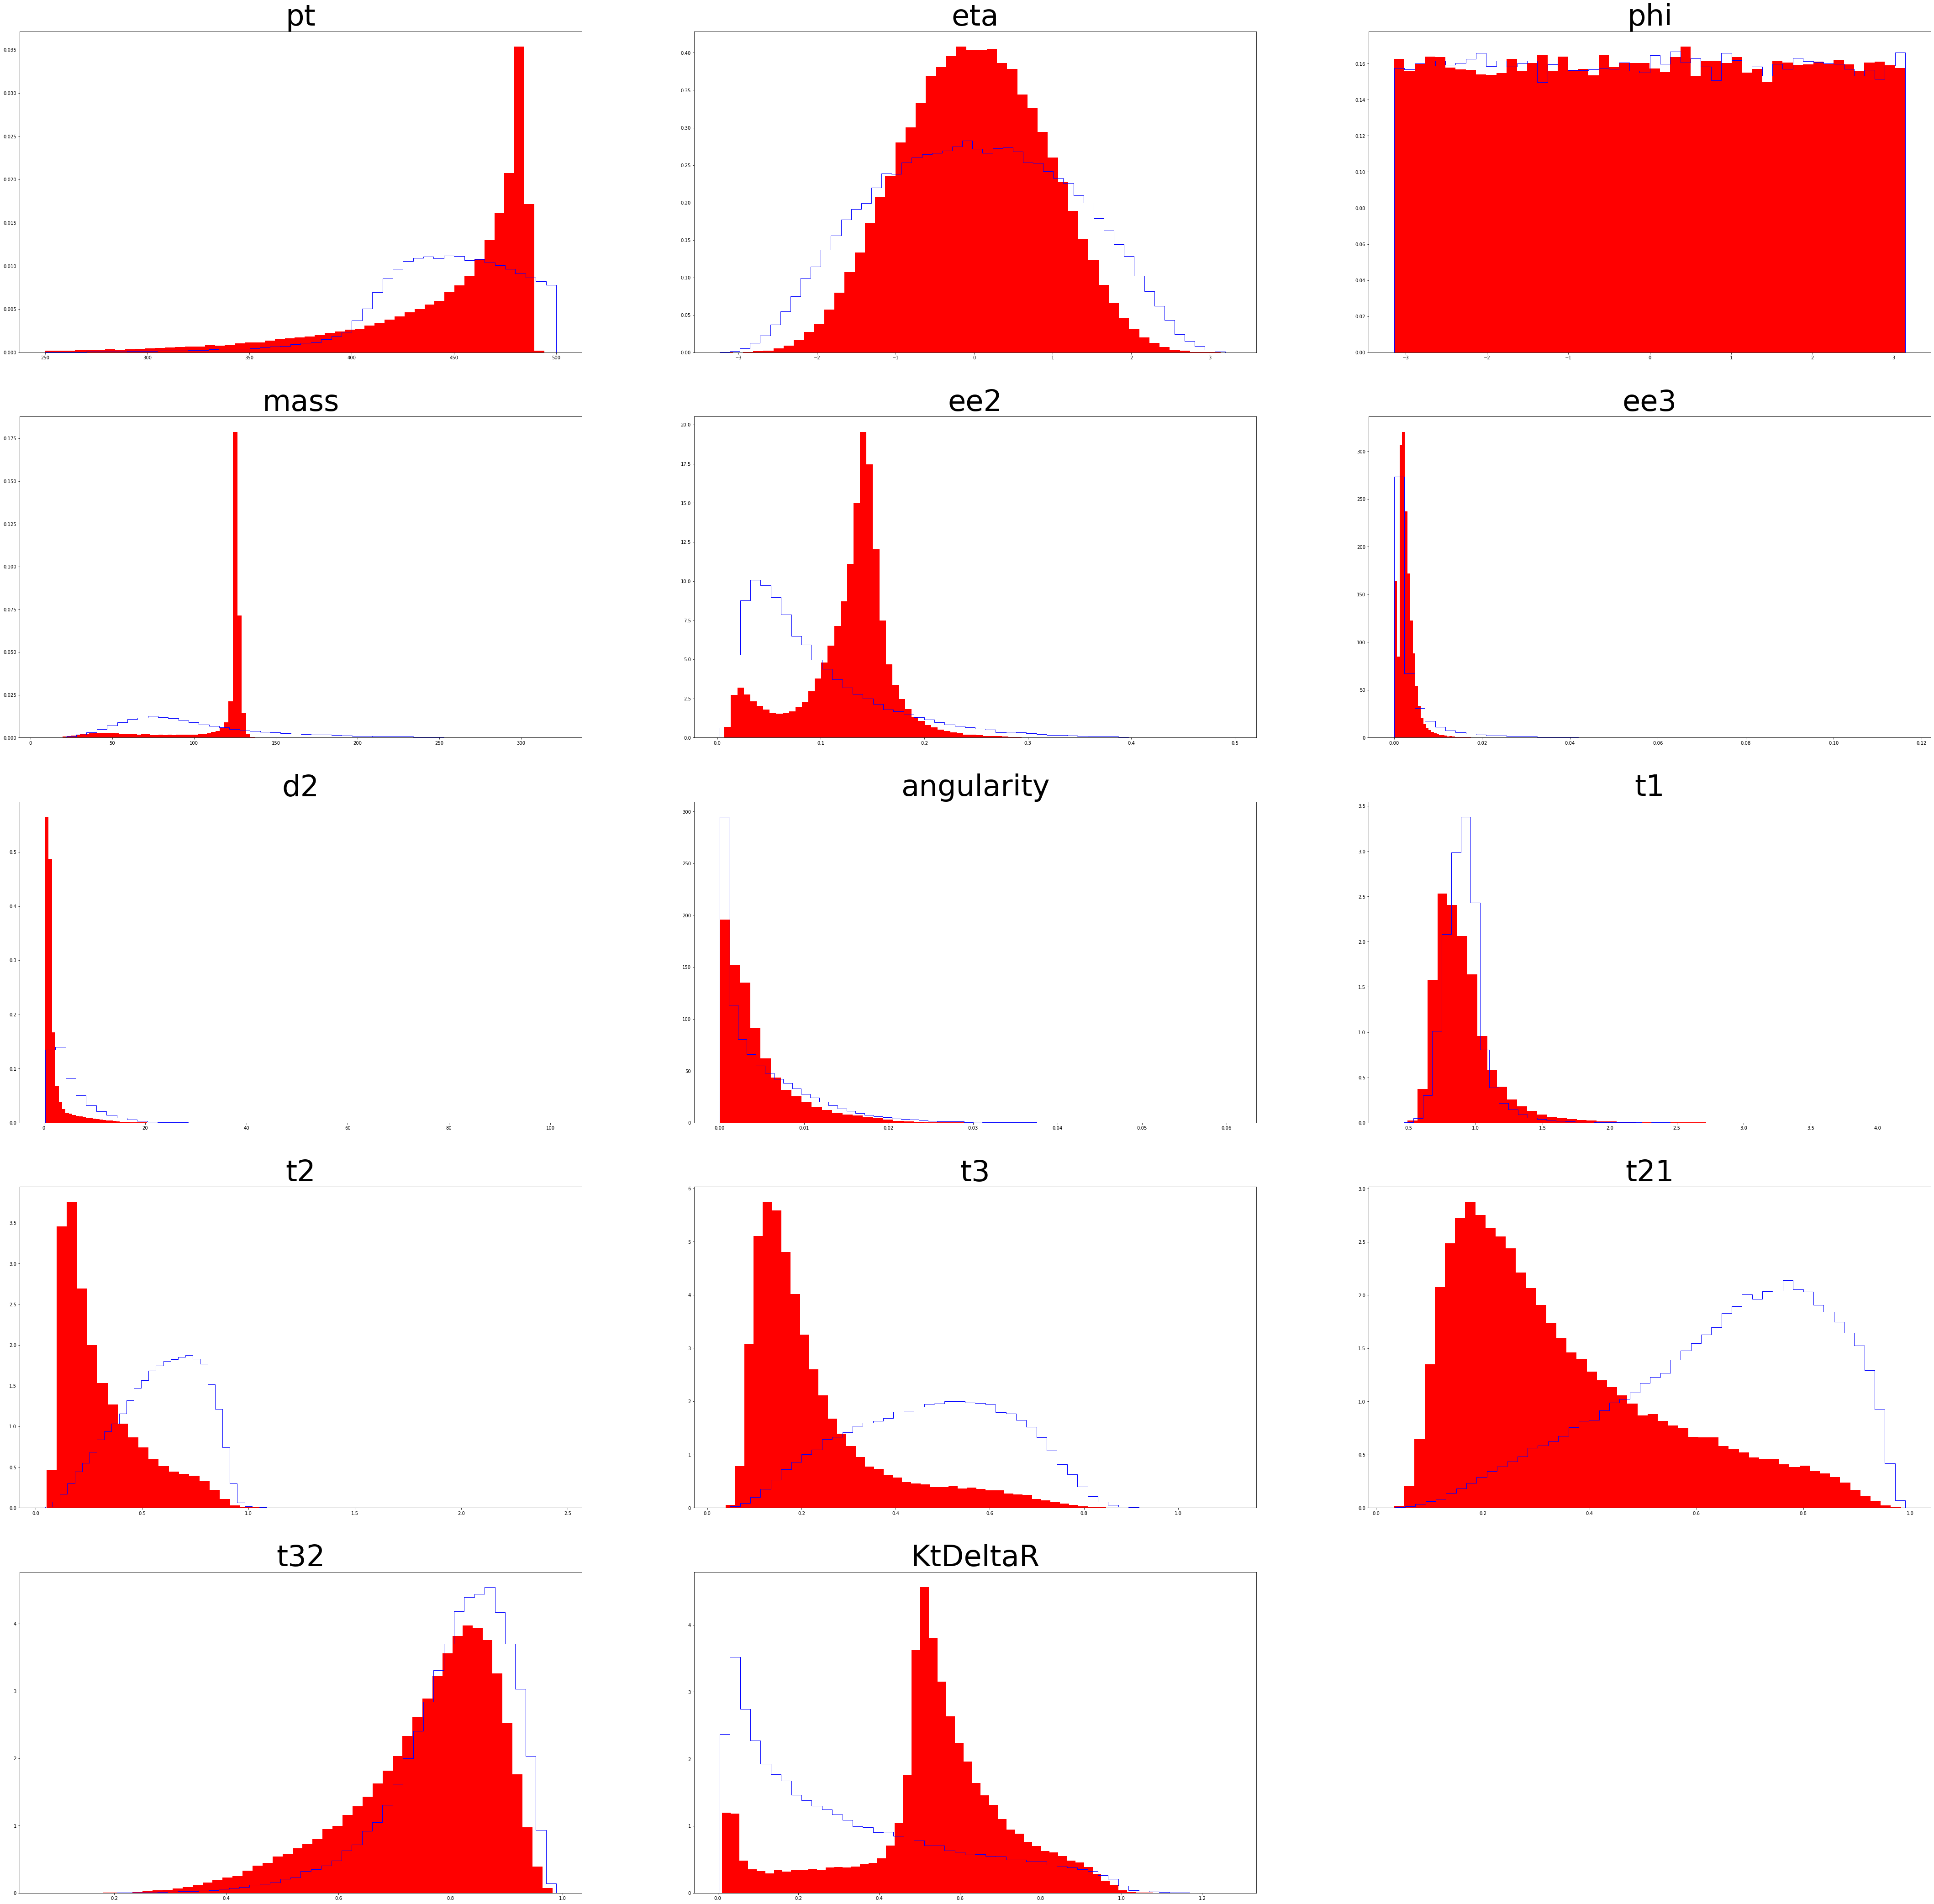

In [24]:
plt.rcParams["figure.figsize"] = (75,75)
fig, ax = plt.subplots(nrows = 5, ncols = 3)
x = range(100000)
for i in range(14):
    ax[math.floor(i/3),i%3].hist(qcd[qcd.columns[i]], color = 'blue', bins = 50, histtype = 'step', density = True)
    ax[math.floor(i/3),i%3].hist(higgs[higgs.columns[i]], color='red', bins = 50, density = True)
    ax[math.floor(i/3),i%3].set_title(str(higgs.columns[i]), fontsize = 64)
ax[4,2].axis('off')
plt.semilogy()
plt.show()

From the above graphs, we can use several of them to determine if our candidate was a potential Higgs particle, while many others wont work. First, we know that eta, phi, ee2, ee3, d2, angularity, t1, and KtDeltaR would all be bad choices to look for the Higgs in. All of these have much over their distribution overlapping with the background. This means that it would be unlikely that the we would recieve a measurement from the Higgs at a value of significance relative to the background since much of the likelyhood of getting a measurement of the Higgs in these parameters is in line with the low significance of the background. This leaves us with pt, mass, t2, t3, t21, and t32 as potential features that we can use. First, we will look at pt as a potential feature

In [44]:
def plotSingle(feature, bins = 50):
    plt.rcParams["figure.figsize"] = (20,15)
    fig, ax = plt.subplots()
    ax.hist(qcd[feature], color = 'blue', histtype = 'step', density = True, bins = bins)
    ax.hist(higgs[feature], color = 'red', density = True, bins = bins)
    plt.title(feature, fontsize = 48)
    plt.semilogy()
    plt.show()

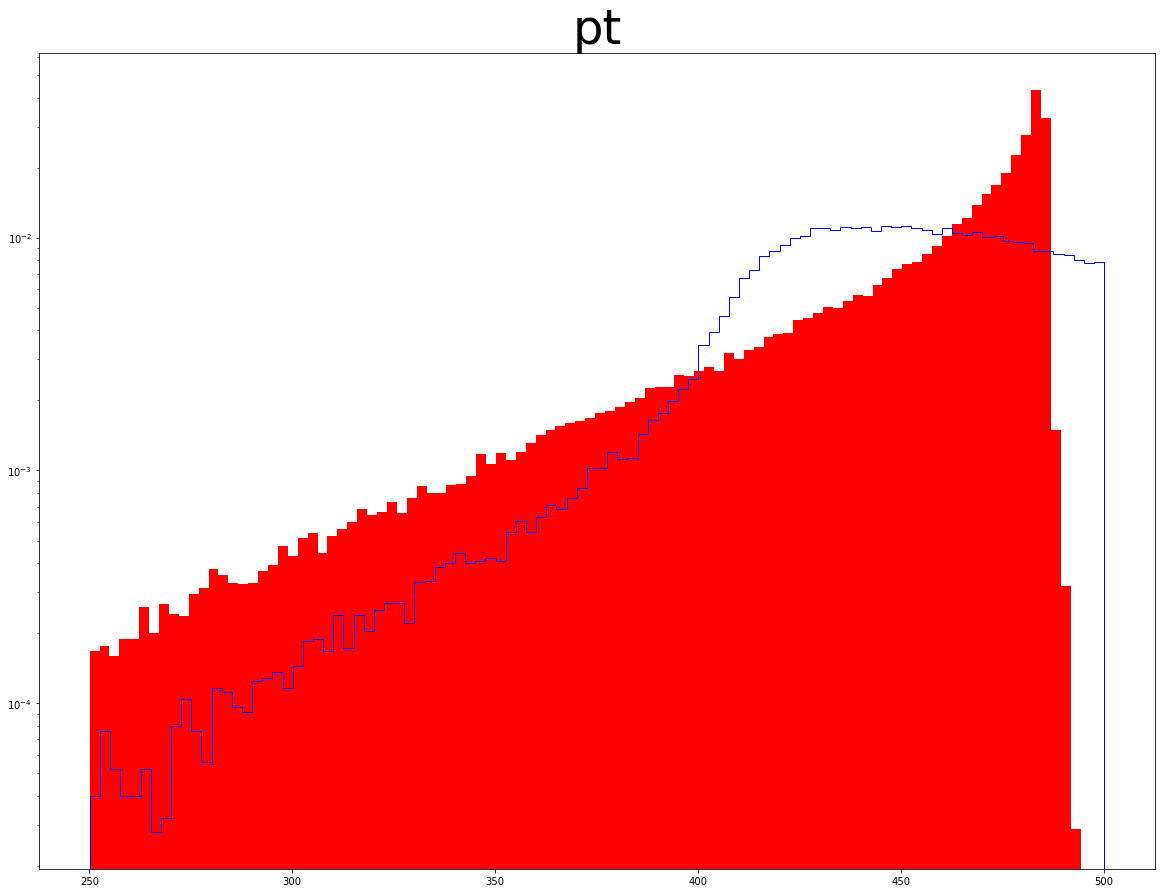

In [45]:
plotSingle('pt', 100)

Upon closer inspection, we see that while this could be a potential feature to use, it would not be a great choice. We can leverage the fact that the Higgs particle is more likely to have a lower value for pt than the background, however it is not significant enough for this to be able to be leveraged effectively. Next we look at mass.

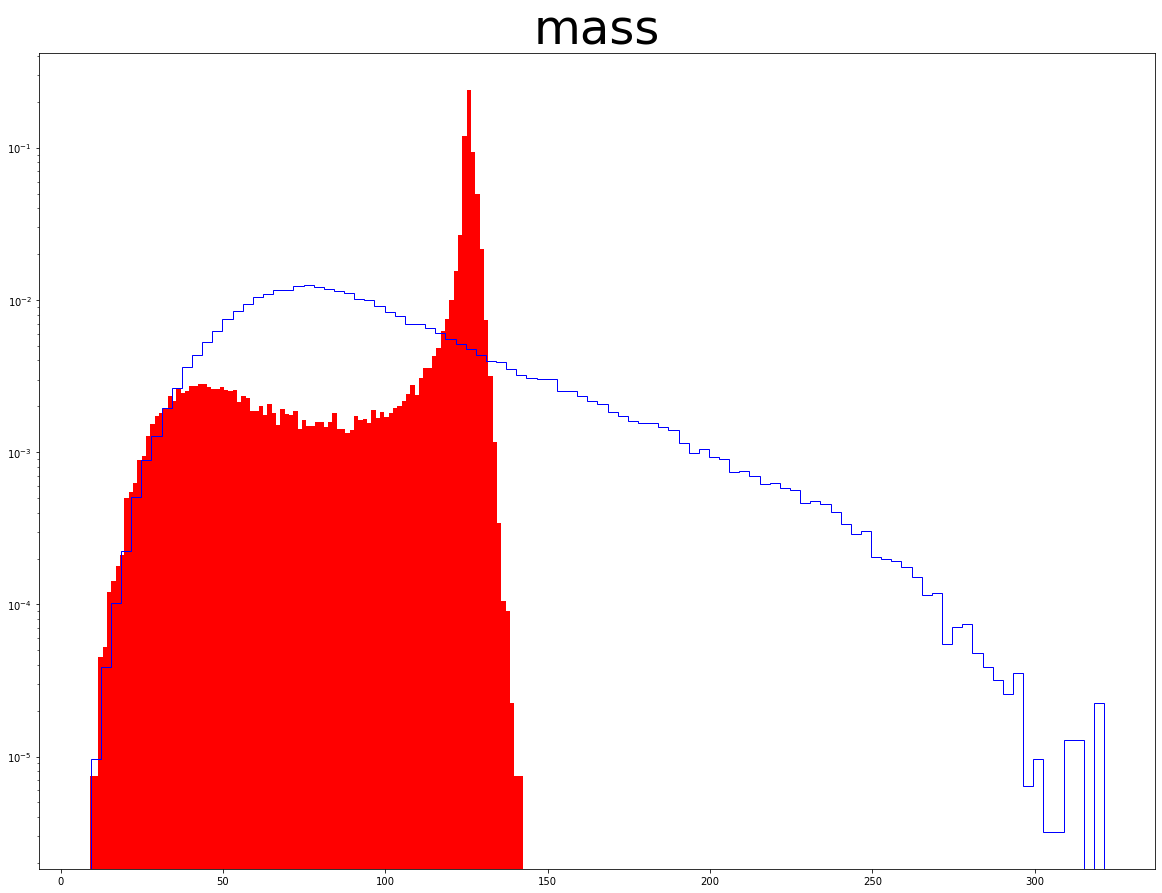

In [46]:
plotSingle('mass',100)

While mass originally looked like a candiadate due to the area on the left side of the tail that was higher than the background we can see that it is far form significant enough to be able to find a Higgs particle in this range. This is because the background and the Higgs are both nearly equally likely to give me a significant measurement. Next we look at t2

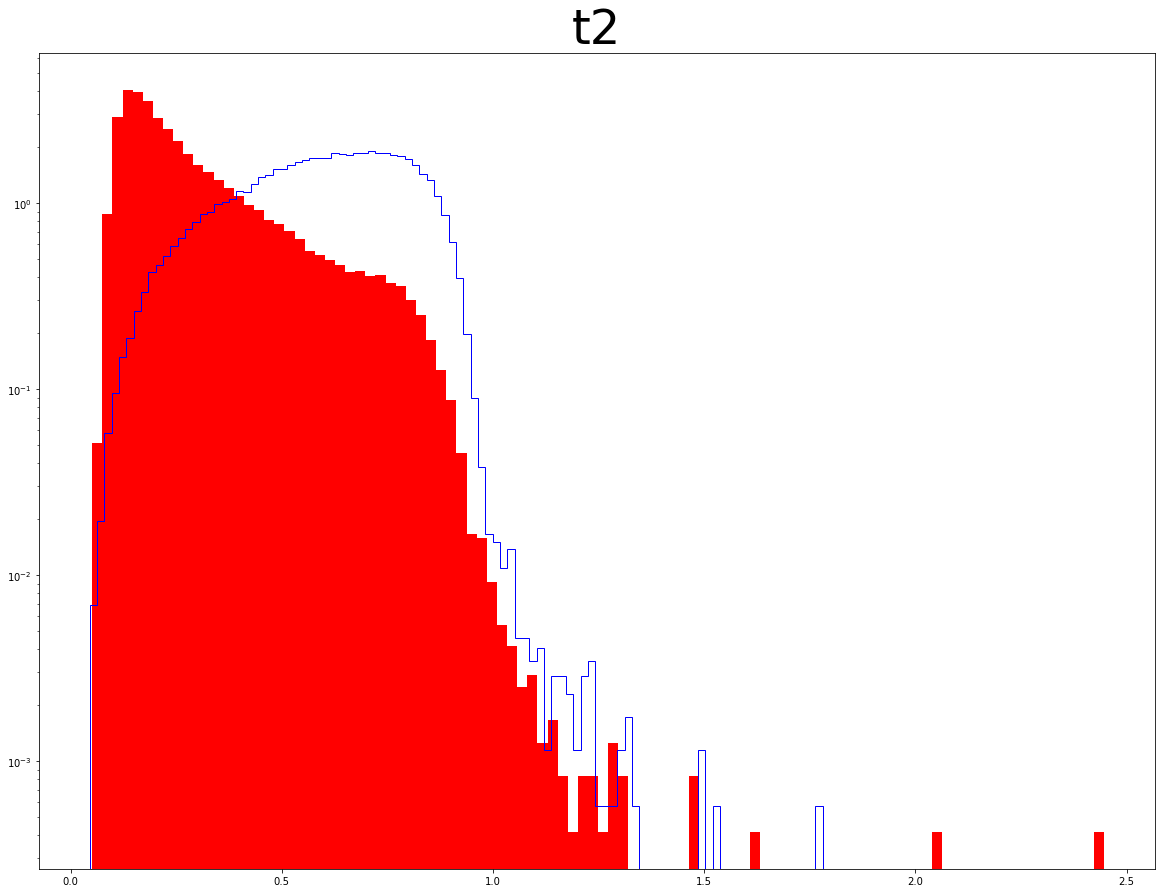

In [49]:
plotSingle('t2',100)

t2 is far from perfect, but is still useable. We see 2 small little peaks between 2 and 2.5 that would be significant measurments. Combined, they represent roughly a 1 in 1000 chance of getting a measurement that is statistically significant. Next we will explore t3.

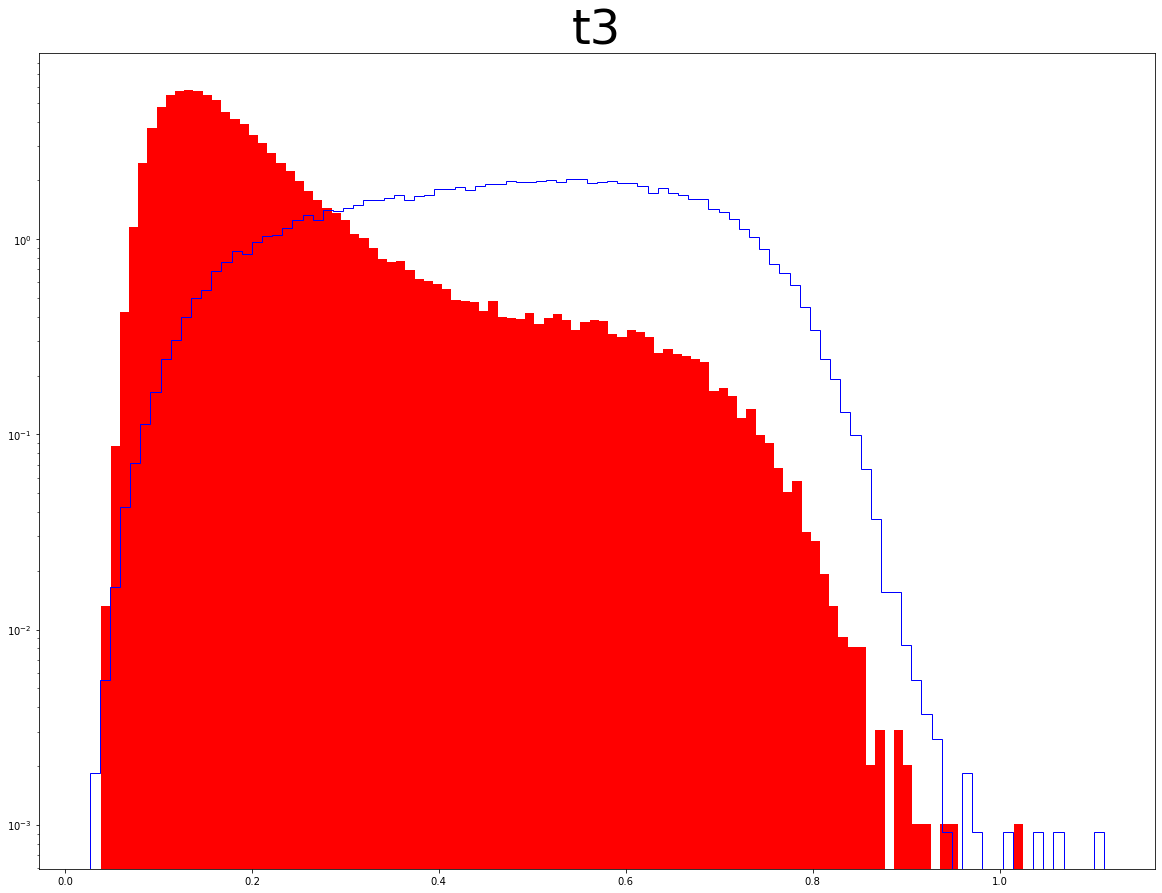

In [51]:
plotSingle('t3',100)

While initially promising, we see that the spike in t3 that wasn't entirely lined up with the background is still contained within a region of still farily high likelyhood. We also see that the tails of our Higgs distribution are close to the tails of the background, making it hard to make a significant discovery here. Next we will look at t21.